## Anderson Yoshizato - AI&ML - Cohort 10
## Project 1: California Housing Price Prediction

In [1]:
# Requisite Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.

In [2]:
housing_dataset = pd.read_excel(r'C:\Users\ThinkPad\Documents\GitHub\Purdue_PG_AIML\Course3_DSwPython\Project Housing\1553768847_housing.xlsx')

<ipython-input-2-8a92c9be883a>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  housing_dataset = pd.read_excel(r'C:\Users\ThinkPad\Documents\GitHub\Purdue_PG_AIML\Course3_DSwPython\Project Housing\1553768847_housing.xlsx')


#### Dataset Description :

Field	Description
longitude	(signed numeric - float) : Longitude value for the block in California, USA
latitude	(numeric - float ) : Latitude value for the block in California, USA
housing_median_age	(numeric - int ) : Median age of the house in the block
total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
population	(numeric - int ) : Count of the total number of population in the block
households	(numeric - int ) : Count of the total number of households in the block
median_income	(numeric - float ) : Median of the total household income of all the houses in the block
ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block

In [3]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [52]:
housing_dataset['median_house_value'].max(), housing_dataset['median_house_value'].min()

(500001, 14999)

In [53]:
housing_dataset.shape

(20640, 10)

In [54]:
X = housing_dataset.iloc[:,:9]
y = housing_dataset.iloc[:,-1]
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

### 2. Handle missing values :

Fill the missing values with the mean of the respective column.

In [55]:
housing_dataset.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [56]:
X.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [57]:
total_bedrooms_mean = housing_dataset['total_bedrooms'].mean()
total_bedrooms_mean

537.8705525375618

In [58]:
X['total_bedrooms'].fillna(total_bedrooms_mean, inplace=True)

In [59]:
X.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [60]:
X.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
dtype: object

In [61]:
X['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### 3. Encode categorical data :

Convert categorical column in the dataset to numerical data.

In [62]:
X_encod = pd.get_dummies(X)
X_encod

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,1,0,0,0


### 4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encod,y,test_size=0.2,random_state=10)

### 5. Standardize data :
Standardize training and test datasets.

In [64]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
scaler.fit(X_test)
X_test_std = scaler.transform(X_test)

### 6. Perform Linear Regression : 
Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

In [65]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression().fit(X_train_std, y_train)
score = lin_model.score(X_train_std, y_train)
score

0.6450273553666998

In [66]:
lin_model.intercept_, lin_model.coef_

(206456.04790455452,
 array([-54476.10287485, -55321.43074371,  13469.23029665, -10818.28237954,
         31309.17719571, -41542.83609617,  26178.27524951,  73610.06677446,
          5978.05735475, -12364.82826787,   2927.29149078,   2669.92386004,
          5685.20676993]))

In [67]:
y_pred = lin_model.predict(X_test_std)

In [68]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

69441.13075095332

### 7. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [69]:
X_train_hinc = pd.DataFrame(X_train.iloc[:,7])
X_test_hinc = pd.DataFrame(X_test.iloc[:,7])

In [70]:
lin_model_hinc = LinearRegression().fit(X_train_hinc, y_train)
score_hinc = lin_model_hinc.score(X_train_hinc, y_train)
score_hinc

0.4725092455317017

In [71]:
y_pred_hinc = lin_model_hinc.predict(X_test_hinc)

In [72]:
rmse_hinc = mean_squared_error(y_test, y_pred_hinc, squared=False)
rmse_hinc

84481.61112913226

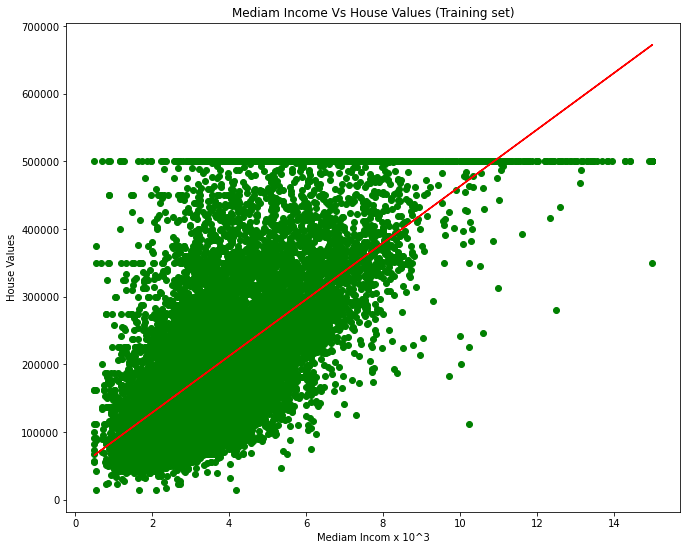

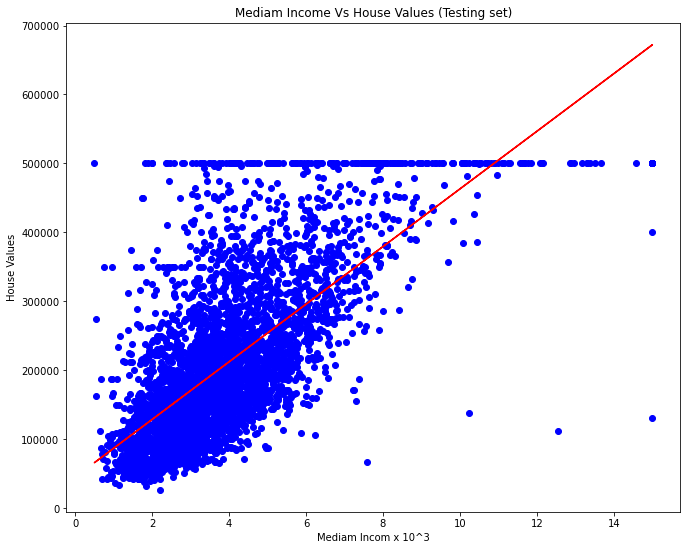

In [73]:
plt.figure(figsize=(11,9))
plt.scatter(X_train_hinc, y_train, color = 'green')
plt.plot(np.array(X_train_hinc), lin_model_hinc.predict(X_train_hinc), color='red')
plt.title('Mediam Income Vs House Values (Training set)')
plt.xlabel('Mediam Incom x 10^3')
plt.ylabel('House Values')
plt.show()

plt.figure(figsize=(11,9))
plt.scatter(X_test_hinc, y_test, color = 'blue')
plt.plot(np.array(X_train_hinc), lin_model_hinc.predict(X_train_hinc), color='red')
plt.title('Mediam Income Vs House Values (Testing set)')
plt.xlabel('Mediam Incom x 10^3')
plt.ylabel('House Values')
plt.show()

### Conclusion:
Two linear regression models were created and their performance compared.
The model using all features presented a better performance compared to the one using the median_income feature exclusively as observed in the R2 and RMSE values.
Based on the computed R2 scores, it is observed that the median_income feature has a major relevance to predict the housing values.